State matrix:
 [[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]]
State vector:
 [0 0 0 0 0 0 0 0 0 1]
System after 1 step:
 [0 0 0 0 0 0 0 1 0 0]


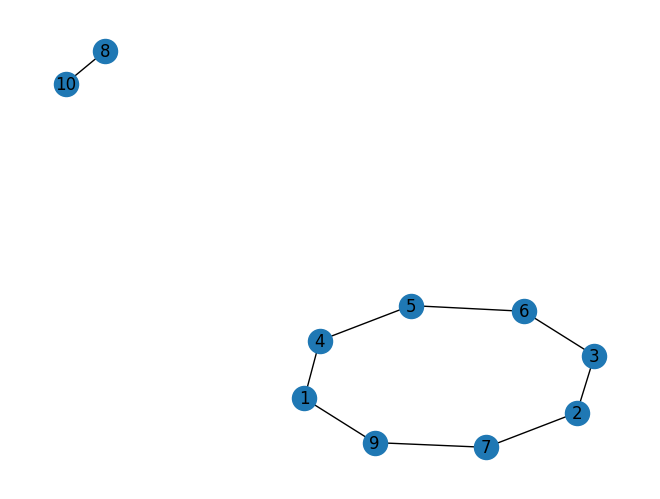

In [641]:
import numpy as np
from numpy.linalg import matrix_power
import networkx as nx
# 13 variantas
# 1 task
stateMatrix = np.array([
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0]])

stateVector = np.array([0,0,0,0,0,0,0,0,0,1])

def systemAfterTime(stateMatrix: np.array, stateVector: np.array, steps: int):
    matrixToPower = matrix_power(stateMatrix, steps)
    return matrixToPower.dot(stateVector)

print("State matrix:\n", stateMatrix)

print("State vector:\n", stateVector)

print("System after 1 step:\n", systemAfterTime(stateMatrix, stateVector, 1))

G = nx.Graph()
# Add nodes and edges
G.add_edge("1", "9")
G.add_edge("2","3")
G.add_edge("3","6")
G.add_edge("4","1")
G.add_edge("5","4")
G.add_edge("6","5")
G.add_edge("7","2")
G.add_edge("8","10")
G.add_edge("9","7")
G.add_edge("10","8")

nx.draw(G, with_labels=True)


In [642]:
# 2 task
# https://www.mathworks.com/matlabcentral/fileexchange/12267-fast-algorithm-for-generating-doubly-stochasstic-matrices
import random
import numpy as np
from math import isclose

def checkIfDoublyStochastic(matrix: np.ndarray) -> bool:
    for i in range(matrix.shape[0]):
        if not isclose(matrix[i-1].sum(),1, abs_tol=1e-8) or not isclose(matrix[:,i-1].sum(),1, abs_tol=1e-8):
            return False
    return True


def systemAfterTime(stateMatrix: np.array, stateVector: np.array, steps: int) -> np.array:
    matrixToPower = matrix_power(stateMatrix, steps)
    return matrixToPower.dot(stateVector)

def doublyStochasticMatrix(n: int) -> np.ndarray:
    matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            matrix[i,j] = 1/n

    for _ in range(n ** 4):
        i1 = np.random.randint(0,n)
        i2 = np.random.randint(0,n)
        j1 = np.random.randint(0,n)
        j2 = np.random.randint(0,n)
        d = random.uniform(0, min(matrix[i1,j1], matrix[i2,j2]))
        matrix[i1,j1] -= d
        matrix[i2,j2] -= d
        matrix[i1,j2] += d
        matrix[i2,j1] += d

    return matrix
matrix = doublyStochasticMatrix(5)
print("Doubly stochastic matrix:\n", matrix)
print("Is doubly stochastic matrix:\n", checkIfDoublyStochastic(matrix))
state = np.array([0,0,0,0,1])
print("\nState vector:\n", state)
print("System after 1 step:\n", systemAfterTime(matrix, state, 1))
print("System after 2 steps:\n", systemAfterTime(matrix, state, 2))
print("System after -2 steps:\n", systemAfterTime(matrix, state, -2))



Doubly stochastic matrix:
 [[0.4777427  0.02276928 0.13191597 0.12505819 0.24251387]
 [0.16787667 0.01642009 0.40362752 0.02762151 0.38445422]
 [0.15858396 0.37397855 0.00357878 0.43802415 0.02583456]
 [0.0403767  0.11616262 0.22388791 0.40840911 0.21116366]
 [0.15541997 0.47066946 0.23698983 0.00088704 0.13603371]]
Is doubly stochastic matrix:
 True

State vector:
 [0 0 0 0 1]
System after 1 step:
 [0.24251387 0.38445422 0.02583456 0.21116366 0.13603371]
System after 2 steps:
 [0.18741877 0.11558412 0.27833805 0.1752017  0.24345736]
System after -2 steps:
 [-235.97762395  167.6970091  -816.68444773  -64.73643984  950.70150242]


In [643]:
# QR decomposition
import numpy as np
import math 

def proj(u:np.array, v:np.array) -> np.array:
    return u * (np.vdot(u,v)/np.vdot(u,u))

def gramSchmidt(vectors:[np.array]) -> [np.array]:
    result = []
    normalizedVectors = []
    for i in range(len(vectors)):
        u = vectors[i].copy()
        for j in range(i):
            u = u - proj(result[j],vectors[i])
        result.append(u)
        norm = 0 + 0j
        for j in range(len(u)):
            norm += u[j] * u[j].conjugate()
        normalizedVectors.append(u / math.sqrt(np.real(norm)))
    return normalizedVectors

def QRdecomposition(matrix: np.ndarray) -> (np.ndarray, np.ndarray):
    split = np.hsplit(matrix, matrix.shape[1])
    normalizedVectors = gramSchmidt(split)
    aValues = []
    for i in range(len(normalizedVectors)):
        aValues.append(np.dot(normalizedVectors[i].T.conjugate(), split[i]) * normalizedVectors[i])

    Q = np.concatenate(normalizedVectors, axis=1)
    R = np.zeros((matrix.shape[0], matrix.shape[1]), dtype=complex)
    for i in range(len(aValues)):
        for j in range(len(aValues)):
            if i <= j:
                R[i,j] = np.dot(normalizedVectors[i].T.conjugate(), split[j])
        
    return Q,R

In [644]:
# task 3
import numpy as np
import random

interval = 10
def generateQuantumMatrix(n: int):
    matrix = np.zeros((n,n),dtype=complex)
    for i in range(n):
        for j in range(n):
            realNumber = random.uniform(-interval,interval)
            complexNumber = random.uniform(-interval,interval)
            matrix[i,j] = complex(realNumber, complexNumber)
    matrix = matrix / np.linalg.norm(matrix)
    Q,R = QRdecomposition(matrix)

    # print("Q:\n", Q)
    # print("R:\n", R)
    # print(matrix)
    # print(Q.dot(R))
    return Q

def checkIfQuantumMatrix(matrix: np.ndarray) -> bool:
    squaredMatrix = np.zeros(matrix.shape)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[0]):
            squaredMatrix[i,j] = np.real(matrix[i,j] * matrix[i,j].conjugate())

    for i in range(squaredMatrix.shape[0]):
        if not isclose(squaredMatrix[i-1].sum(),1, abs_tol=1e-8) or not isclose(squaredMatrix[:,i-1].sum(),1, abs_tol=1e-8):
            return False
    return True
        
def systemAfterTime(stateMatrix: np.array, stateVector: np.array, steps: int) -> np.array:
    matrixToPower = matrix_power(stateMatrix, steps)
    return matrixToPower.dot(stateVector)

def probabilityToBeInState(stateMatrix: np.array, steps: int, state: int, initialState:int) -> float:
    stateVector = np.zeros(stateMatrix.shape[0])
    stateVector[initialState] = 1
    matrixToPower = matrix_power(stateMatrix, steps)
    stateNSteps = matrixToPower.dot(stateVector)[state] 
    return stateNSteps * stateNSteps.conjugate()

matrixSize = 5
matrix = generateQuantumMatrix(matrixSize)
print("Random matrix:\n", np.around(matrix,3))# use around to print less digits
print("Is quantum matrix:\n", checkIfQuantumMatrix(matrix))
state = np.zeros(matrixSize)

state[-1] = 1
print("\nState vector:\n", state)
print("System after 1 step:\n", systemAfterTime(matrix, state, 1))
print("System after 2 steps:\n", systemAfterTime(matrix, state, 2))
print("System after -2 steps:\n", systemAfterTime(matrix, state, -2))
print("Probability to be in state 0 after 1 step:\n", probabilityToBeInState(matrix, 1, 0, 4))

Random matrix:
 [[-0.029-0.445j -0.247+0.424j -0.376-0.255j  0.58 +0.118j  0.062+0.009j]
 [ 0.374+0.32j  -0.154+0.139j  0.384-0.172j  0.351-0.551j  0.256+0.211j]
 [-0.377-0.243j -0.118-0.259j -0.05 -0.148j -0.188-0.105j  0.323+0.737j]
 [ 0.368-0.383j -0.14 -0.455j -0.12 +0.585j  0.172-0.114j  0.283-0.108j]
 [-0.064+0.268j -0.58 -0.269j -0.473-0.11j  -0.089-0.353j -0.371-0.095j]]
Is quantum matrix:
 True

State vector:
 [0. 0. 0. 0. 1.]
System after 1 step:
 [ 0.06198602+0.00939493j  0.25575939+0.21080063j  0.32337865+0.73668565j
  0.2833881 -0.10771051j -0.37137191-0.09546061j]
System after 2 steps:
 [ 0.0709754 -0.36903356j  0.16793346-0.04312342j -0.01781031-0.5081428j
 -0.46282295-0.10316363j -0.10441754-0.5783064j ]
System after -2 steps:
 [ 0.02299248+0.29905163j  0.09713745-0.24804291j  0.21291184-0.06377271j
 -0.39995283-0.53326963j -0.10441754+0.5783064j ]
Probability to be in state 0 after 1 step:
 (0.003930530873120337+0j)


/var/folders/2d/3vb6hz_s28z4y7mpqyhs8nbw0000gq/T/ipykernel_58536/1454505961.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  normalizedVectors.append(u / math.sqrt(np.real(norm)))
/var/folders/2d/3vb6hz_s28z4y7mpqyhs8nbw0000gq/T/ipykernel_58536/1454505961.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R[i,j] = np.dot(normalizedVectors[i].T.conjugate(), split[j])


In [645]:
# 4 task
# | \phi \rangle |\phi>
phi = np.array([-6-5j,
                1+2j,
                1+2j,
                -3+6j,
                -1+2j,
                5-3j,
                5-6j,
                -4-8j], dtype=complex)
print(np.real(np.vdot(phi,phi))) # since this vector is not normalized, we need to do that


phiNorm = phi / np.linalg.norm(phi)
print("phi:\n", phiNorm)
print("phi:\n", np.real(np.vdot(phiNorm,phiNorm)))
totalProb = 0
for i in phiNorm:
    print("Value:", i)
    probability = np.real(i.conjugate()* i)
    totalProb += probability
    print("probability: ", probability)

print(totalProb)

296.0
phi:
 [-0.34874292-0.2906191j   0.05812382+0.11624764j  0.05812382+0.11624764j
 -0.17437146+0.34874292j -0.05812382+0.11624764j  0.2906191 -0.17437146j
  0.2906191 -0.34874292j -0.23249528-0.46499055j]
phi:
 1.0000000000000002
Value: (-0.34874291623145787-0.29061909685954823j)
probability:  0.2060810810810811
Value: (0.05812381937190964+0.11624763874381928j)
probability:  0.016891891891891893
Value: (0.05812381937190964+0.11624763874381928j)
probability:  0.016891891891891893
Value: (-0.17437145811572893+0.34874291623145787j)
probability:  0.15202702702702706
Value: (-0.05812381937190964+0.11624763874381928j)
probability:  0.016891891891891893
Value: (0.29061909685954823-0.17437145811572893j)
probability:  0.11486486486486489
Value: (0.29061909685954823-0.34874291623145787j)
probability:  0.2060810810810811
Value: (-0.23249527748763857-0.46499055497527714j)
probability:  0.2702702702702703
1.0


In [646]:
# 5 task
fi = np.array ([-2+3j,
                6j,
                7j,
                -8+4j,
                -8-6j,
                4+2j,
                -7,2j])

print(np.vdot(fi,fi))
fiNorm = fi / np.linalg.norm(fi)
print(fiNorm)
transitionAmplitude = np.vdot(fiNorm.conjugate(),phiNorm)

print("norm: ", np.real(np.vdot(fiNorm,fiNorm)))

print("transition amplitude: <fi|phi> ", transitionAmplitude)
print("prob", np.real(transitionAmplitude * transitionAmplitude.conjugate()))


(351+0j)
[-0.1067521 +0.16012815j  0.        +0.32025631j  0.        +0.37363236j
 -0.42700841+0.21350421j -0.42700841-0.32025631j  0.21350421+0.1067521j
 -0.37363236+0.j          0.        +0.1067521j ]
norm:  1.0000000000000002
transition amplitude: <fi|phi>  (0.08686775895582635-0.10237985876936677j)
prob 0.018027643027643037


In [647]:
# 6 task
# Parašykite kodą, kuris randa dviejų operatorių (matricų)  komutatorių.

def commutator(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    return A.dot(B) - B.dot(A)

omega1 = np.array([[1,-1-1j],
                  [-1+1j,1]],dtype=complex)
print("omega:\n", omega1)

omega2 = np.array([[0,-1],
                   [-1,2]],dtype=complex)


print("omega:\n", omega2)
print("star", omega1.dot(omega2))
print("star", omega2.dot(omega1))
print("commutator", commutator(omega1,omega2))

Sx = np.array([[0,1],
                [1,0]],dtype=complex)
Sy = np.array([[0,-1j],
                [1j,0]],dtype=complex)
Sz = np.array([[1,0],
                [0,-1]],dtype=complex)

print("commutato\n", commutator(Sx,Sy))
print("commutator\n", commutator(Sy,Sz))
print("commutator\n", commutator(Sz,Sx))


omega:
 [[ 1.+0.j -1.-1.j]
 [-1.+1.j  1.+0.j]]
omega:
 [[ 0.+0.j -1.+0.j]
 [-1.+0.j  2.+0.j]]
star [[ 1.+1.j -3.-2.j]
 [-1.+0.j  3.-1.j]]
star [[ 1.-1.j -1.+0.j]
 [-3.+2.j  3.+1.j]]
commutator [[ 0.+2.j -2.-2.j]
 [ 2.-2.j  0.-2.j]]
commutato
 [[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]
commutator
 [[0.+0.j 0.+2.j]
 [0.+2.j 0.+0.j]]
commutator
 [[ 0.+0.j  2.+0.j]
 [-2.+0.j  0.+0.j]]


In [648]:
# 7 tas
# Parašykite kodą, kuris randa Ermito operatoriaus $\Omega$ tam tikros būsenos $\psi$ vidurkį ir dispersiją.

def average(omega: np.ndarray, psi: np.array) -> float:
    omegaPsi = omega.dot(psi.transpose())
    mean = omegaPsi.conjugate().dot(psi)
    return mean.real

def variance(omega:np.ndarray, psi: np.array) -> float:
    mean = average(omega,psi)
    deltaOmegaPsi = omega - np.eye(omega.shape[0],dtype=complex)* mean
    dOPSquared = deltaOmegaPsi.dot(deltaOmegaPsi)
    variance = average(dOPSquared,psi)
    return variance.real

omega = np.array([[1,-1j],
                    [1j,2]],dtype=complex)

psi = np.array([math.sqrt(2)/2,(math.sqrt(2)/2)*1j],dtype=complex)
print("average: ", average(omega,psi))
print("variance: ",variance(omega,psi))

average:  2.5000000000000004
variance:  0.25


In [649]:
# 8 task 
# Sugalvokite kokią nors unitarinę 4x4 matricą,
# kurios elementai priklauso nuo tam tikro parametro  𝑡 . 
# Tarkime, kad laikas yra diskretus, t.y.  𝑡=0,1,2,3,...  
# Pradiniu laiko omentu sistema yra būsenoje 𝜓 .Parašykite, kuris randa jos būseną nurodytu laiko momentu  𝑇 .

def rotationXMatrix(theta: float) -> np.ndarray:
    return np.array([[math.cos(theta/2),-1j*math.sin(theta/2)],
                    [-1j*math.sin(theta/2),math.cos(theta/2)]],dtype=complex)

t = 2

unitaryMatrix = np.kron(rotationXMatrix(t),rotationXMatrix(t))

psi = np.array([1,0,0,0],dtype=complex)
print("psi:\n", psi)
print("unitary matrix:\n", unitaryMatrix)

def dynamics(initialStates:np.array, timeUnits: int, unitaryMatrix: np.ndarray):
    numberOfPoint = initialStates.shape[0]
    print(initialStates)
    for i in range(timeUnits):
        initialStates = unitaryMatrix.dot(initialStates)
        print("after "+i.__str__() + " unitary matrix, states:\n"+np.around(initialStates,2).__str__(),"\n")
    print("finished timeUnits:\n",initialStates,"\n")
    printingData(initialStates,numberOfPoint)
    for i in range(timeUnits):
        initialStates = unitaryMatrix.conjugate().transpose().dot(initialStates)
        print("after "+i.__str__() + " unitary matrix dagger, states:\n"+np.around(initialStates,2).__str__(),"\n")
    print("reverted back to initialStates\n", initialStates)

    # init = initialStates
    # for i in range(1000):
    #     initialStates = unitaryMatrix.dot(initialStates)
    #     if np.allclose(init,initialStates) and np.allclose(unitaryMatrix.dot(init),unitaryMatrix.dot(initialStates)):
    #         print("after "+i.__str__() + " unitary matrix, states, start to repeat:\n"+initialStates.__str__(),"\n")
    #         break

def printingData(state:np.array, numberOfPoints:int):
    normOfStates = state.conjugate().dot(state)
    for i in range(numberOfPoints):
        print ("Probability of being at point " + i.__str__() + " is " + (state[i].conjugate() * state[i] / normOfStates ** 2).real.__str__())


dynamics(psi, 3, unitaryMatrix)


psi:
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
unitary matrix:
 [[ 0.29192658+0.j          0.        -0.45464871j  0.        -0.45464871j
  -0.70807342-0.j        ]
 [ 0.        -0.45464871j  0.29192658+0.j         -0.70807342-0.j
   0.        -0.45464871j]
 [ 0.        -0.45464871j -0.70807342-0.j          0.29192658+0.j
   0.        -0.45464871j]
 [-0.70807342-0.j          0.        -0.45464871j  0.        -0.45464871j
   0.29192658+0.j        ]]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
after 0 unitary matrix, states:
[ 0.29+0.j    0.  -0.45j  0.  -0.45j -0.71+0.j  ] 

after 1 unitary matrix, states:
[ 0.17+0.j    0.  +0.38j  0.  +0.38j -0.83+0.j  ] 

after 2 unitary matrix, states:
[ 0.98+0.j    0.  +0.14j  0.  +0.14j -0.02+0.j  ] 

finished timeUnits:
 [ 0.98008514+0.j          0.        +0.13970775j  0.        +0.13970775j
 -0.01991486+0.j        ] 

Probability of being at point 0 is 0.9605668881667442
Probability of being at point 1 is 0.019518255158438542
Probability of being at point 2 is 0.0195182

In [650]:
# 9 task

def hadamardGate() -> np.ndarray:
    return np.array([[1,1],
                    [1,-1]],dtype=complex) / math.sqrt(2)

def XGate() -> np.ndarray:
    return np.array([[0,1],
                    [1,0]],dtype=complex)

def YGate() -> np.ndarray:
    return np.array([[0,-1j],
                    [1j,0]],dtype=complex)

def ZGate() -> np.ndarray:
    return np.array([[1,0],
                    [0,-1]],dtype=complex)

def TGate() -> np.ndarray:
    return np.array([[1,0],
                    [0,math.e ** (1j * math.pi / 4)]],dtype=complex)

def SGate() -> np.ndarray:
    return np.array([[1,0],
                    [0,1j]],dtype=complex)

def IdentityGate() -> np.ndarray:
    return np.array([[1,0],
                    [0,1]],dtype=complex)

def oneQubitLine(gateString: str, qubit: np.array) -> np.array:
    for i in gateString:
        function: callable = oneGateCheck(i)
        qubit = function().dot(qubit)
        print(qubit)
    return qubit

def oneGateCheck(gate: chr) -> callable:
    if gate == "H":
        return hadamardGate
    elif gate == "X":
        return XGate
    elif gate == "Y":
        return YGate
    elif gate == "Z":
        return ZGate
    elif gate == "T":
        return TGate
    elif gate == "S":
        return SGate
    elif gate == "-":
        return IdentityGate
    else:
        raise Exception("Wrong gate, gate: " + gate + " is not defined")

gateString = "HYZTHX"
qubit = np.array([1,0],dtype=complex)
print("qubit:\n", qubit)
print("gate string:\n", gateString)
print("after gate string:\n", oneQubitLine(gateString,qubit))

qubit:
 [1.+0.j 0.+0.j]
gate string:
 HYZTHX
[0.70710678+0.j 0.70710678+0.j]
[0.-0.70710678j 0.+0.70710678j]
[0.-0.70710678j 0.-0.70710678j]
[0. -0.70710678j 0.5-0.5j       ]
[ 0.35355339-0.85355339j -0.35355339-0.14644661j]
[-0.35355339-0.14644661j  0.35355339-0.85355339j]
after gate string:
 [-0.35355339-0.14644661j  0.35355339-0.85355339j]


In [652]:
# 10 task 2 qubit line

# skaitome kad C CU gate dalis yra pirmas qubit, o U gate dalis yra antras qubit, jei gauname UC(tarp gateString), tai antras qubit yra C, pirmas yra U
def CUGate(gate: callable) -> np.ndarray:
    gateMatrix = gate()
    return np.array([[1,0,0,0],
                    [0,1,0,0],
                    [0,0,gateMatrix[0,0],gateMatrix[0,1]],
                    [0,0,gateMatrix[1,0],gateMatrix[1,1]]],dtype=complex)

def UCGate(gate: callable) -> np.ndarray:
    gateMatrix = gate()
    return np.array([[1,0,0,0],
                    [0,gateMatrix[0,0],0,gateMatrix[0,1]],
                    [0,0,1,0],
                    [0,gateMatrix[1,0],0,gateMatrix[1,1]]],dtype=complex)

def twoQubitLine(gateString1: str, gateString2: str, qubit1: np.array, qubit2: np.array) -> (np.array):
    if gateString1.__len__() != gateString2.__len__():
        raise Exception("Gate strings must be the same length")
    combinedQubits = np.kron(qubit1,qubit2)
    for i in range(gateString1.__len__()):
        if gateString1[i] == "C" and gateString2[i] != "C":
            gate: callable = oneGateCheck(gateString2[i])
            combinedQubits = CUGate(gate).dot(combinedQubits)
        elif gateString1[i] != "C" and gateString2[i] == "C":
            gate: callable = oneGateCheck(gateString1[i])
            combinedQubits = UCGate(gate).dot(combinedQubits)
        elif gateString1[i] == "C" and gateString2[i] == "C":
            raise Exception("Two C gates in a row")
        else:
            combinedQubits = np.kron(oneGateCheck(gateString1[i])(), oneGateCheck(gateString2[i])()).dot(combinedQubits)
    return combinedQubits

gateString1 = "HCZ-HX"
gateString2 = "CXCHHC"

qubit1 = np.array([1,0],dtype=complex)
qubit2 = np.array([1,0],dtype=complex)

qubits = twoQubitLine(gateString1,gateString2,qubit1,qubit2)
for i in range(2):
    for j in range(2):
        print("|",i, j,">:", qubits[i*2+j], "probability: ", (qubits[i*2+j].conjugate() * qubits[i*2+j]).real)

| 0 0 >: (0.7071067811865474+0j) probability:  0.4999999999999998
| 0 1 >: 0j probability:  0.0
| 1 0 >: (0.7071067811865474+0j) probability:  0.4999999999999998
| 1 1 >: 0j probability:  0.0
